FRP

Raw Data

Total FRP points in CSV: 2022355
Number of unique days: 8795


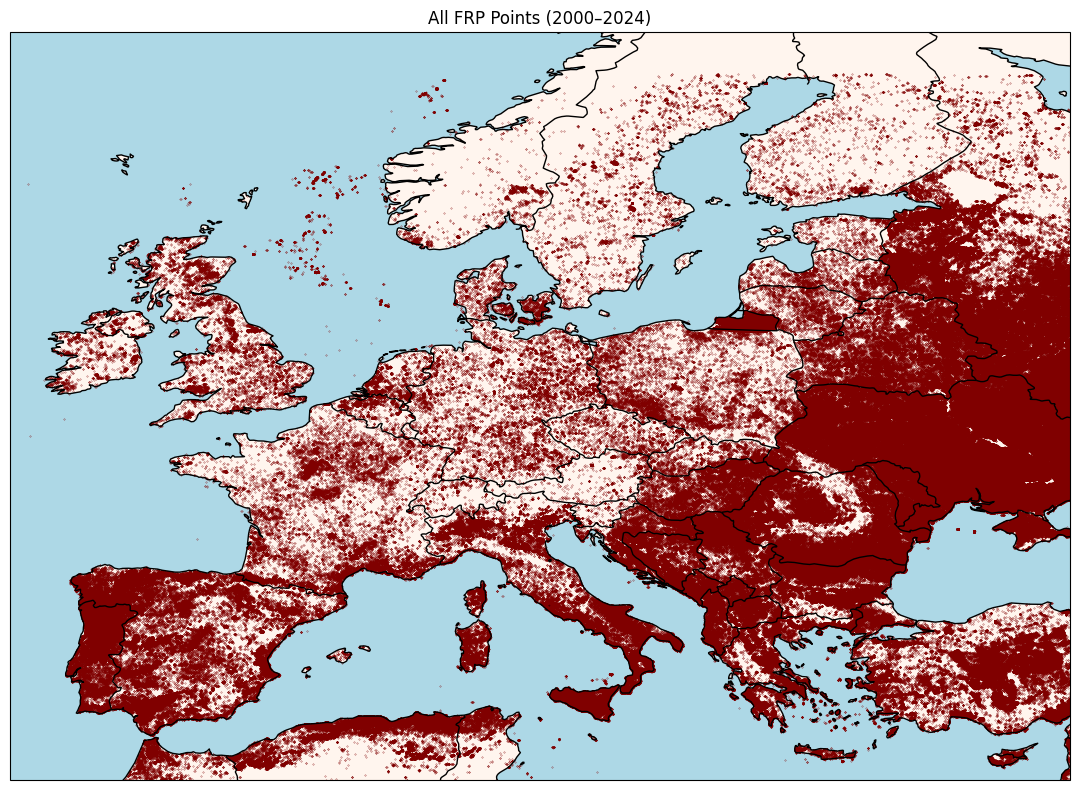

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,36.8527,35.3594,306.0,2.1,1.4,2000-11-01,815,Terra,MODIS,60,6.03,294.4,13.2,D,0
1,49.5459,23.5306,326.6,1.0,1.0,2000-11-01,950,Terra,MODIS,84,6.03,286.4,21.9,D,0
2,49.5480,23.5170,347.1,1.0,1.0,2000-11-01,950,Terra,MODIS,95,6.03,291.3,53.6,D,0
3,48.7390,29.1738,306.8,1.5,1.2,2000-11-01,950,Terra,MODIS,33,6.03,287.7,13.7,D,0
4,49.5695,23.4383,303.8,1.0,1.0,2000-11-01,950,Terra,MODIS,57,6.03,286.8,5.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022350,44.5394,3.0130,300.9,1.2,1.1,2024-12-31,941,Terra,MODIS,43,61.03,276.7,9.9,D,0
2022351,40.3944,33.5275,311.0,1.2,1.1,2024-12-31,1130,Aqua,MODIS,71,61.03,283.6,16.0,D,0
2022352,40.8579,33.0911,300.0,1.2,1.1,2024-12-31,1130,Aqua,MODIS,22,61.03,280.7,8.5,D,0
2022353,45.2580,31.6737,311.4,1.2,1.1,2024-12-31,1131,Aqua,MODIS,48,61.03,282.5,17.0,D,3


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
df = pd.read_csv(r"E:\IPMA\FRP\FRP_2000_2024.csv")

# Ensure lowercase columns for consistency
df.columns = [col.lower() for col in df.columns]

# Convert acquisition date to datetime
df['acq_date'] = pd.to_datetime(df['acq_date'])

# === COUNTING POINTS AND UNIQUE DAYS ===
total_points = len(df)
unique_days = df['acq_date'].nunique()
print(f"Total FRP points in CSV: {total_points}")
print(f"Number of unique days: {unique_days}")

# Start the plot
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-12, 36, 34, 66])

# Add map features
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='seashell')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot all FRP points with a uniform color
ax.scatter(df['longitude'], df['latitude'], color='maroon', s=0.05, alpha=1, transform=ccrs.PlateCarree())

# Title only, no colorbar
plt.title("All FRP Points (2000–2024)")
plt.tight_layout()
plt.show()
df


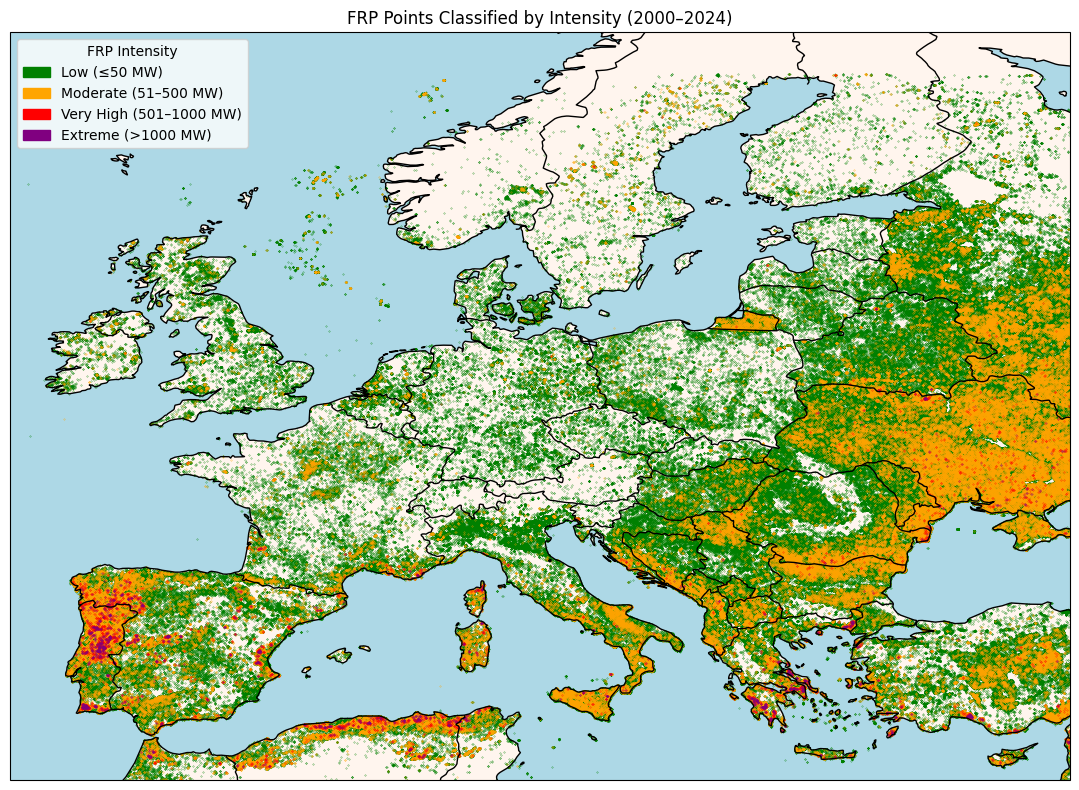

In [2]:
# Classification 4 levels  ≤50 MW (low intensity), 50 to ≤500 MW (moderate to high intensity), 500 ≤ 1000 MW (very high intensity),and >1000 MW (extreme intensity)

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Patch

# Load and prepare data
df = pd.read_csv(r"E:\IPMA\FRP\FRP_2000_2024.csv")
df.columns = [col.lower() for col in df.columns]
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Classification bins and labels
bins = [0, 50, 500, 1000, float('inf')]
labels = ['Low (≤50 MW)', 'Moderate (51–500 MW)', 'Very High (501–1000 MW)', 'Extreme (>1000 MW)']
colors = ['green', 'orange', 'red', 'purple']

# Classify FRP into intensity categories
df['intensity'] = pd.cut(df['frp'], bins=bins, labels=labels, include_lowest=True)

# Begin plot
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-12, 36, 34, 66])  # Study area extent

# Add map features
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='seashell')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot each category separately and create legend handles as colored squares
legend_handles = []
for label, color in zip(labels, colors):
    cat_df = df[df['intensity'] == label]
    scatter = ax.scatter(cat_df['longitude'], cat_df['latitude'], label=label, color=color,
                         s=0.05, alpha=1, transform=ccrs.PlateCarree())
    legend_handles.append(Patch(color=color, label=label))

# Add legend with custom handles (colored squares)
plt.legend(handles=legend_handles, title='FRP Intensity', loc='upper left')
plt.title("FRP Points Classified by Intensity (2000–2024)")
plt.tight_layout()
plt.show()


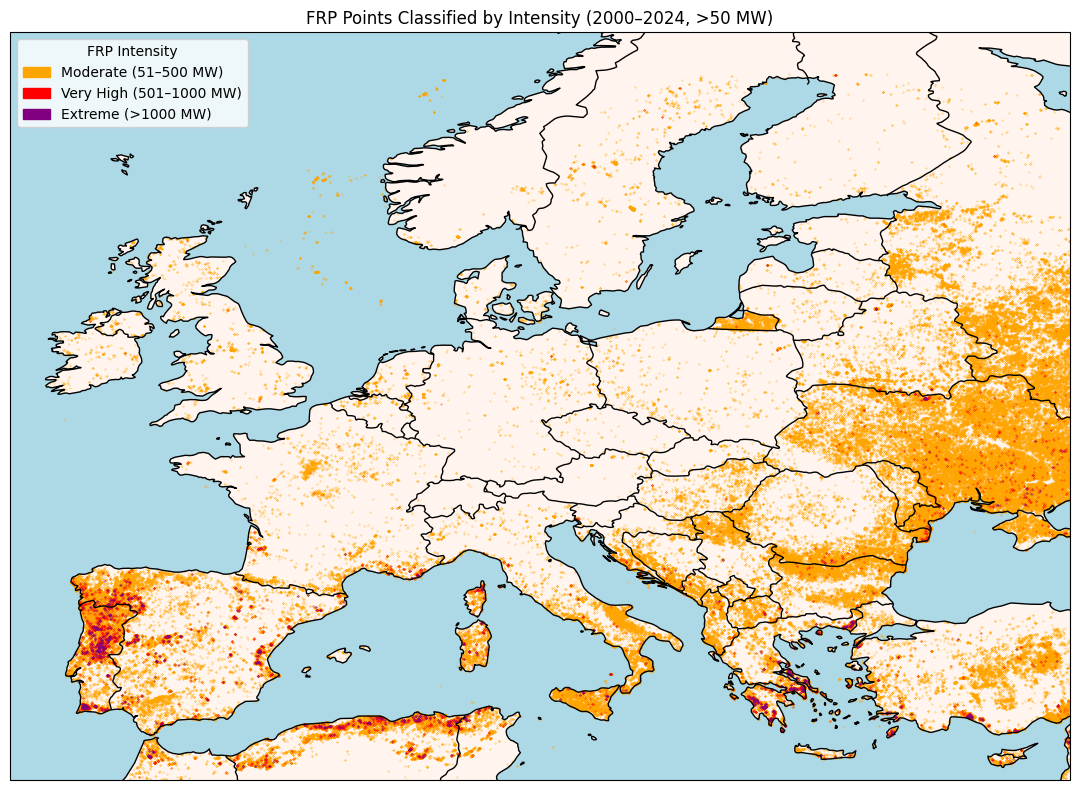

In [ ]:
# Classification 3 levels 50 to ≤500 MW (moderate to high intensity), 500 ≤ 1000 MW (very high intensity),and >1000 MW (extreme intensity)

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Patch

# Load and prepare data
df = pd.read_csv(r"E:\IPMA\FRP\FRP_2000_2024.csv")
df.columns = [col.lower() for col in df.columns]
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Filter out FRP values below 50 MW
df = df[df['frp'] > 50]

# Classification bins and labels (starting from >50)
bins = [50, 500, 1000, float('inf')]
labels = ['Moderate (51–500 MW)', 'Very High (501–1000 MW)', 'Extreme (>1000 MW)']
colors = ['orange', 'red', 'purple']

# Classify FRP into intensity categories
df['intensity'] = pd.cut(df['frp'], bins=bins, labels=labels, include_lowest=False)

# Begin plot
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-12, 36, 34, 66])  # Study area extent

# Add map features
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='seashell')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot each category separately and create legend handles
legend_handles = []
for label, color in zip(labels, colors):
    cat_df = df[df['intensity'] == label]
    ax.scatter(cat_df['longitude'], cat_df['latitude'], label=label, color=color,
               s=0.05, alpha=1, transform=ccrs.PlateCarree())
    legend_handles.append(Patch(color=color, label=label))

# Add legend with custom handles
plt.legend(handles=legend_handles, title='FRP Intensity', loc='upper left')
plt.title("FRP Points Classified by Intensity (2000–2024, >50 MW)")
plt.tight_layout()
plt.show()


FRP csv file to separate csv files by country

In [3]:
# Get a point dataset for each region and removes >50 MW

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Paths to shapefiles
shapefile_paths = {
    "Spain": r"E:\IPMA\Countries\ESP\gadm41_ESP_0.shp",
    "Portugal": r"E:\IPMA\Countries\PRT\gadm41_PRT_0.shp",
    "Greece": r"E:\IPMA\Countries\GRC\gadm41_GRC_0.shp",
    "Italy": r"E:\IPMA\Countries\ITA\gadm41_ITA_0.shp",
}

# Load FRP CSV data
df = pd.read_csv(r"E:\IPMA\FRP\FRP_2000_2024.csv")
df.columns = [col.lower() for col in df.columns]
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Filter points with frp > 50 MW
df_filtered = df[df['frp'] > 50].copy()

# Create GeoDataFrame from filtered points
geometry = [Point(xy) for xy in zip(df_filtered['longitude'], df_filtered['latitude'])]
gdf_points = gpd.GeoDataFrame(df_filtered, geometry=geometry, crs="EPSG:4326")

# Loop over countries, filter points inside, and save CSV
for country, shp_path in shapefile_paths.items():
    # Load country polygon(s)
    gdf_country = gpd.read_file(shp_path).to_crs("EPSG:4326")

    # Spatial join: points inside country polygon
    points_in_country = gpd.sjoin(gdf_points, gdf_country, predicate='within', how='inner')

    # Drop spatial join helper columns and geometry before saving CSV
    points_in_country = points_in_country.drop(columns=['index_right', 'geometry'])

    # Save filtered points to CSV
    output_path = rf"E:\IPMA\FRP\FRP_2000_2024_{country}.csv"
    points_in_country.to_csv(output_path, index=False)

    print(f"Saved {len(points_in_country)} points for {country} (FRP > 50 MW) to {output_path}")


Saved 20530 points for Spain (FRP > 50 MW) to E:\IPMA\FRP\FRP_2000_2024_Spain.csv
Saved 24891 points for Portugal (FRP > 50 MW) to E:\IPMA\FRP\FRP_2000_2024_Portugal.csv
Saved 10425 points for Greece (FRP > 50 MW) to E:\IPMA\FRP\FRP_2000_2024_Greece.csv
Saved 12169 points for Italy (FRP > 50 MW) to E:\IPMA\FRP\FRP_2000_2024_Italy.csv


Plots

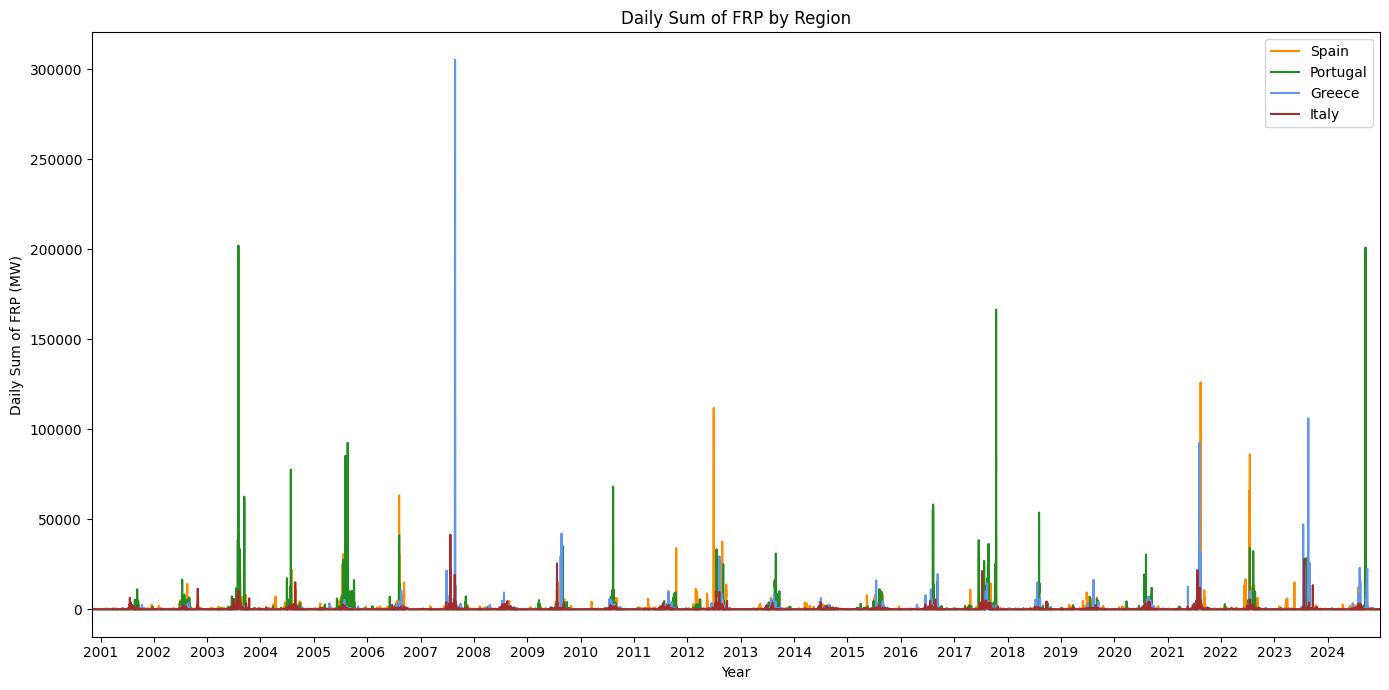

In [4]:
# Time series for daily sum of FRP over defined regions

import pandas as pd
import matplotlib.pyplot as plt

# CSV paths for each country (original files without filtering)
csv_paths = {
    "Spain": r"E:\IPMA\FRP\FRP_2000_2024_Spain.csv",
    "Portugal": r"E:\IPMA\FRP\FRP_2000_2024_Portugal.csv",
    "Greece": r"E:\IPMA\FRP\FRP_2000_2024_Greece.csv",
    "Italy": r"E:\IPMA\FRP\FRP_2000_2024_Italy.csv",
}

# Colors for plotting
region_colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown",
}

all_regions_daily = pd.DataFrame()

for region, csv_path in csv_paths.items():
    df = pd.read_csv(csv_path)
    df.columns = [col.lower() for col in df.columns]
    df['acq_date'] = pd.to_datetime(df['acq_date'])

    # Select only FRP > 50 MW
    df = df[df['frp'] > 50]

    # Group by date and sum FRP
    daily_sum = df.groupby('acq_date')['frp'].sum().reset_index()
    daily_sum.rename(columns={'frp': region}, inplace=True)

    if all_regions_daily.empty:
        all_regions_daily = daily_sum
    else:
        all_regions_daily = pd.merge(all_regions_daily, daily_sum, on='acq_date', how='outer')

all_regions_daily = all_regions_daily.sort_values('acq_date').fillna(0)

# Plotting
start_date = all_regions_daily['acq_date'].min()
end_date = all_regions_daily['acq_date'].max()

plt.figure(figsize=(14, 7))
for region in csv_paths.keys():
    plt.plot(all_regions_daily['acq_date'], all_regions_daily[region], label=region, color=region_colors[region])

plt.xlabel("Year")
plt.ylabel("Daily Sum of FRP (MW)")
plt.title("Daily Sum of FRP by Region")
plt.legend()
plt.grid(False)

import matplotlib.dates as mdates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set limits to actual data range so no padding beyond
ax.set_xlim(start_date, end_date)

plt.tight_layout()
plt.show()


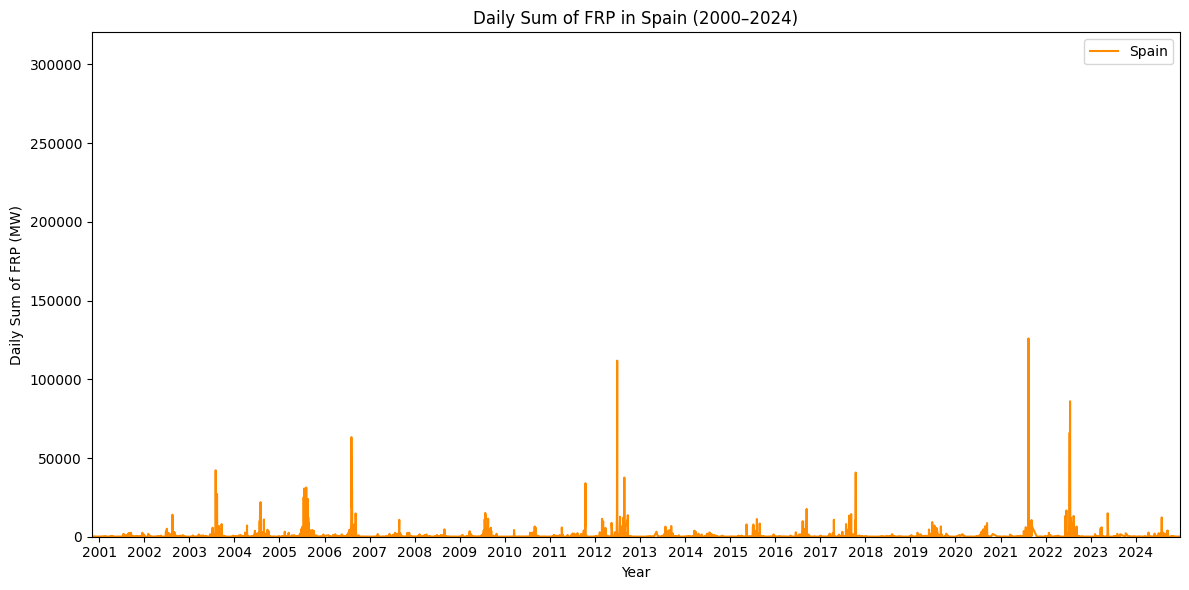

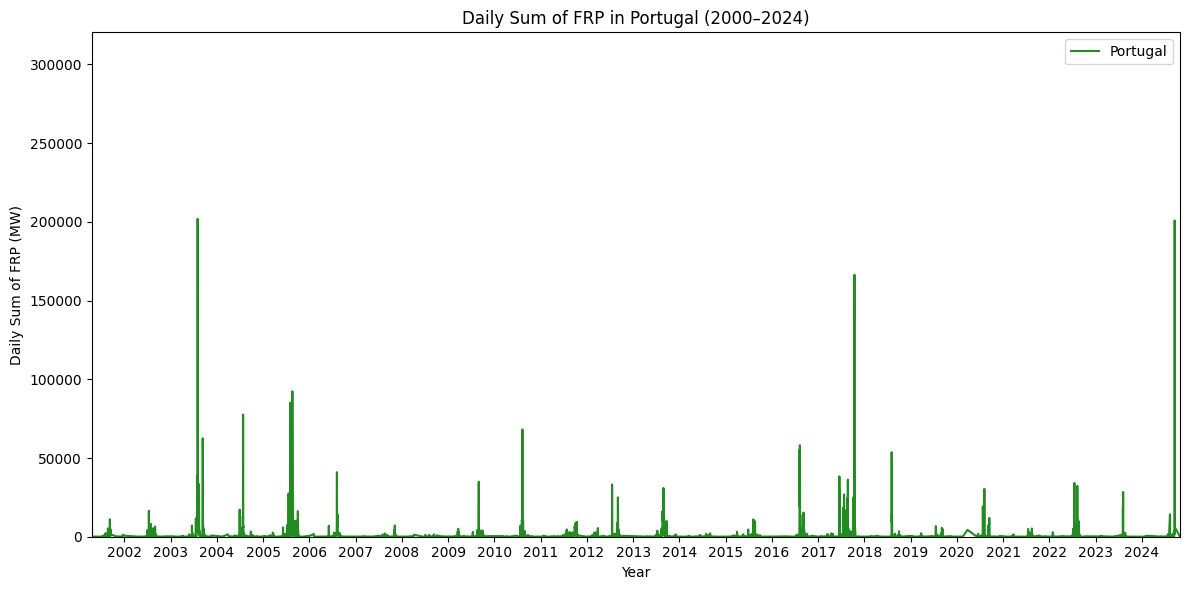

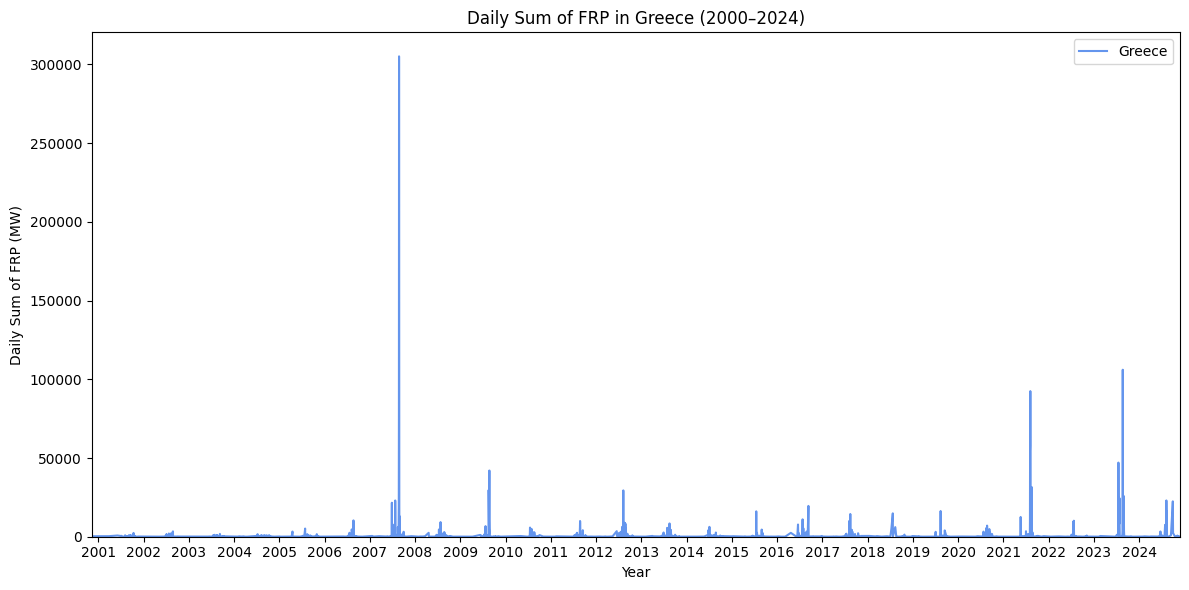

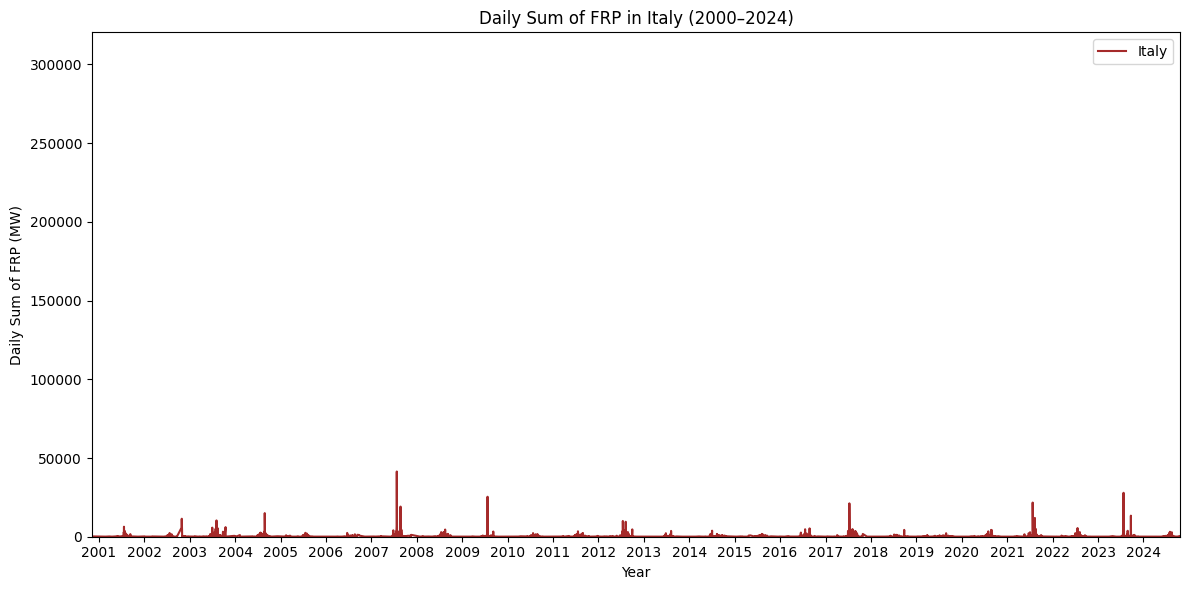

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# CSV paths for each country (already filtered to FRP > 50 MW)
csv_paths = {
    "Spain": r"E:\IPMA\FRP\FRP_2000_2024_Spain.csv",
    "Portugal": r"E:\IPMA\FRP\FRP_2000_2024_Portugal.csv",
    "Greece": r"E:\IPMA\FRP\FRP_2000_2024_Greece.csv",
    "Italy": r"E:\IPMA\FRP\FRP_2000_2024_Italy.csv",
}

# Colors for plotting
region_colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown",
}

# First pass to determine global y-axis max
global_max = 0
region_data = {}

for region, path in csv_paths.items():
    df = pd.read_csv(path)
    df.columns = [col.lower() for col in df.columns]
    df['acq_date'] = pd.to_datetime(df['acq_date'])
    df = df[df['frp'] > 50]  # just to ensure even if CSV wasn't filtered

    daily_sum = df.groupby('acq_date')['frp'].sum().reset_index()
    region_data[region] = daily_sum

    max_value = daily_sum['frp'].max()
    if max_value > global_max:
        global_max = max_value

# Plot each region with common y-axis
for region, daily_sum in region_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sum['acq_date'], daily_sum['frp'], label=region, color=region_colors[region])
    plt.xlabel("Year")
    plt.ylabel("Daily Sum of FRP (MW)")
    plt.title(f"Daily Sum of FRP in {region} (2000–2024)")
    plt.grid(False)
    plt.ylim(0, global_max * 1.05)  # add 5% margin above global max

    # Format x-axis by year
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_xlim(daily_sum['acq_date'].min(), daily_sum['acq_date'].max())

    plt.legend()
    plt.tight_layout()
    plt.show()


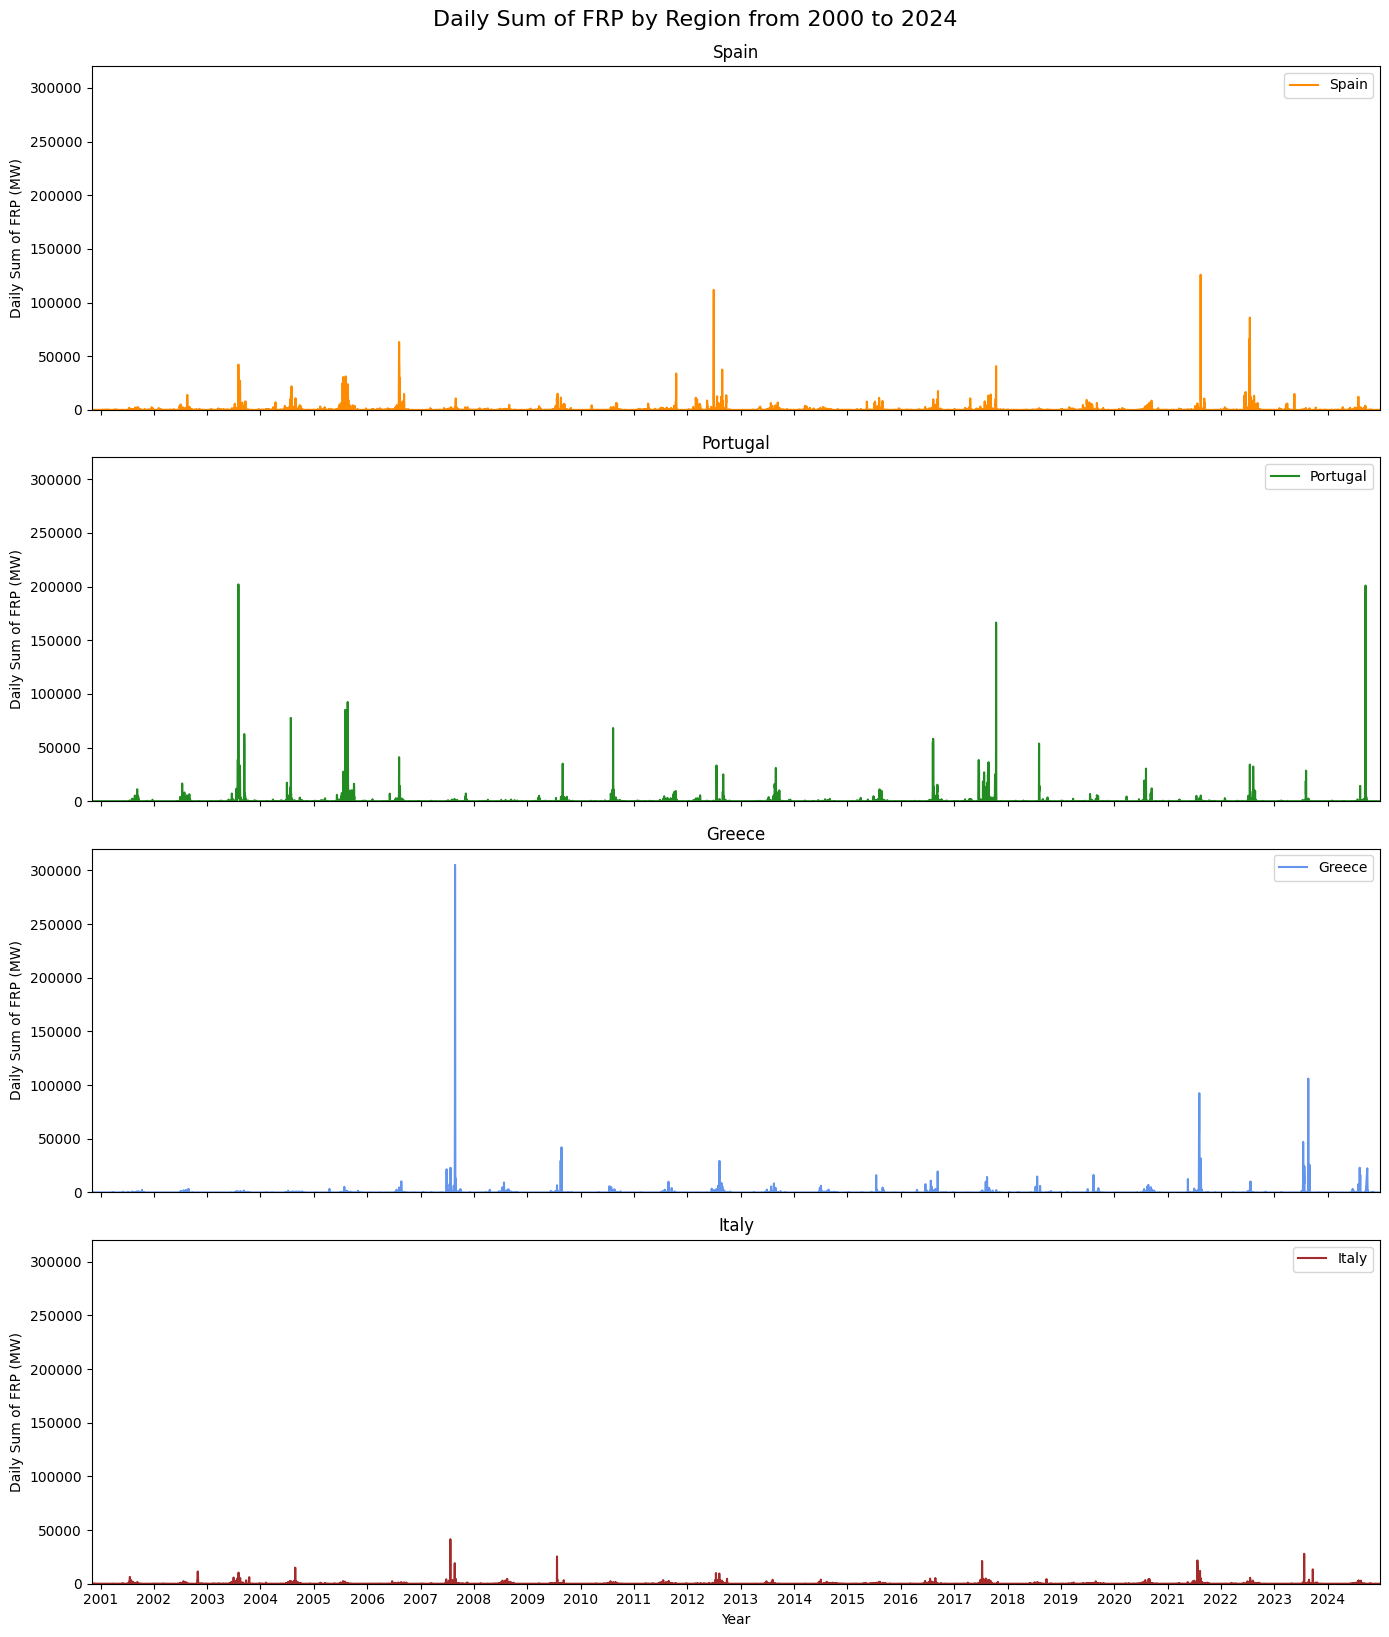

In [5]:
# Time series for daily sum of FRP over defined regions separated plots

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# CSV paths for each country
csv_paths = {
    "Spain": r"E:\IPMA\FRP\FRP_2000_2024_Spain.csv",
    "Portugal": r"E:\IPMA\FRP\FRP_2000_2024_Portugal.csv",
    "Greece": r"E:\IPMA\FRP\FRP_2000_2024_Greece.csv",
    "Italy": r"E:\IPMA\FRP\FRP_2000_2024_Italy.csv",
}

# Colors for plotting
region_colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown",
}

all_regions_daily = pd.DataFrame()

# Load and prepare data
for region, csv_path in csv_paths.items():
    df = pd.read_csv(csv_path)
    df.columns = [col.lower() for col in df.columns]
    df['acq_date'] = pd.to_datetime(df['acq_date'])

    # Filter for FRP > 50 MW
    df = df[df['frp'] > 50]

    # Group by date and sum FRP
    daily_sum = df.groupby('acq_date')['frp'].sum().reset_index()
    daily_sum.rename(columns={'frp': region}, inplace=True)

    if all_regions_daily.empty:
        all_regions_daily = daily_sum
    else:
        all_regions_daily = pd.merge(all_regions_daily, daily_sum, on='acq_date', how='outer')

all_regions_daily = all_regions_daily.sort_values('acq_date').fillna(0)

# Determine global limits
start_date = all_regions_daily['acq_date'].min()
end_date = all_regions_daily['acq_date'].max()
ymax = all_regions_daily[list(csv_paths.keys())].max().max() * 1.05  # 5% margin

# Create subplots (4 rows, 1 column)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 16), sharex=True, sharey=True)

# Add a main title for the whole figure
fig.suptitle("Daily Sum of FRP by Region from 2000 to 2024", fontsize=16, y=1.02)

for ax, region in zip(axes, csv_paths.keys()):
    ax.plot(all_regions_daily['acq_date'], all_regions_daily[region], 
            color=region_colors[region], label=region)
    ax.set_ylabel("Daily Sum of FRP (MW)")
    ax.set_title(region)
    ax.legend()
    ax.grid(False)
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(0, ymax)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axes[-1].set_xlabel("Year")

plt.tight_layout()
plt.subplots_adjust(top=0.985)  # adjust to make room for the suptitle
plt.show()


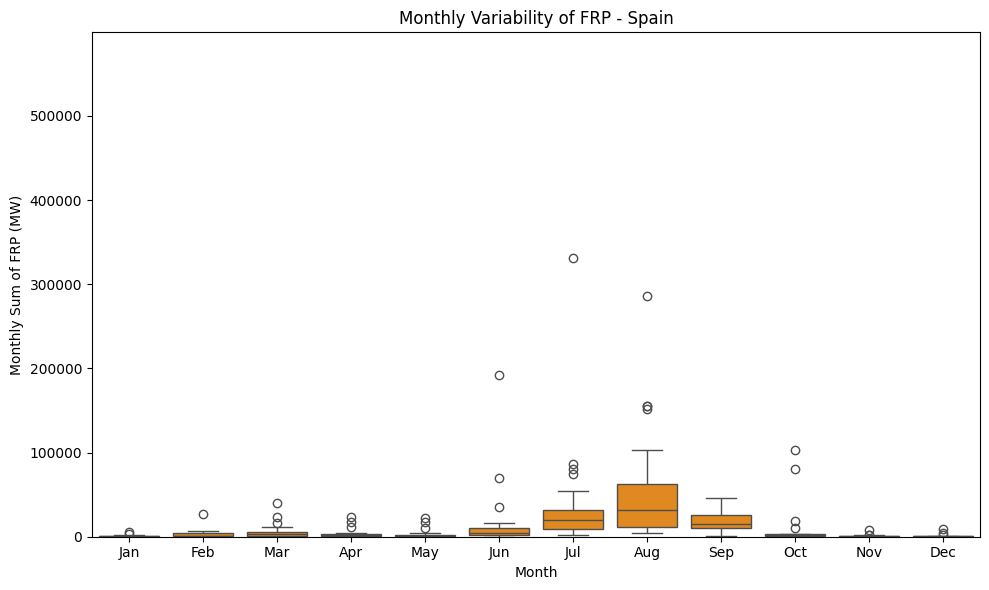

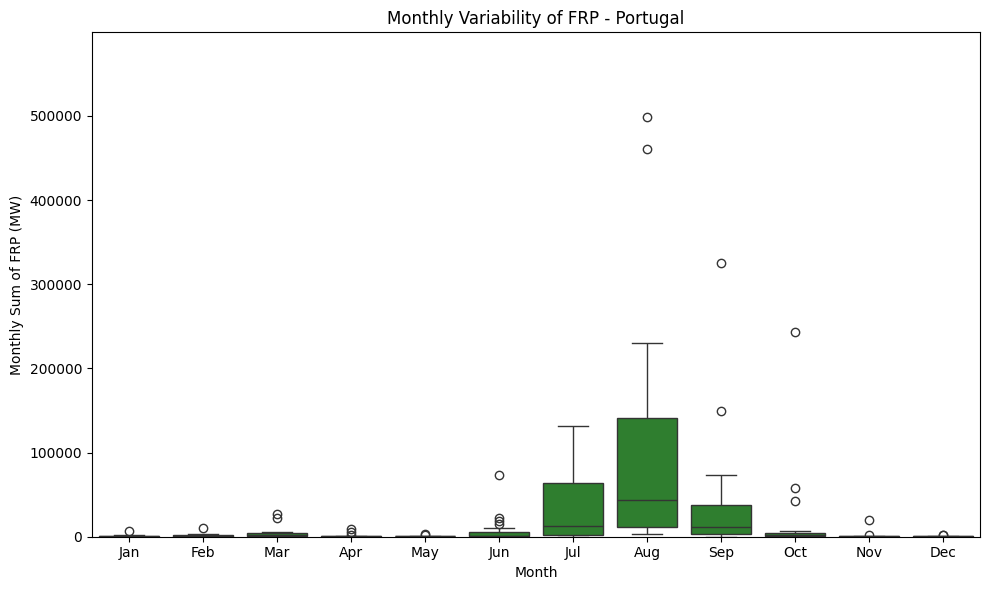

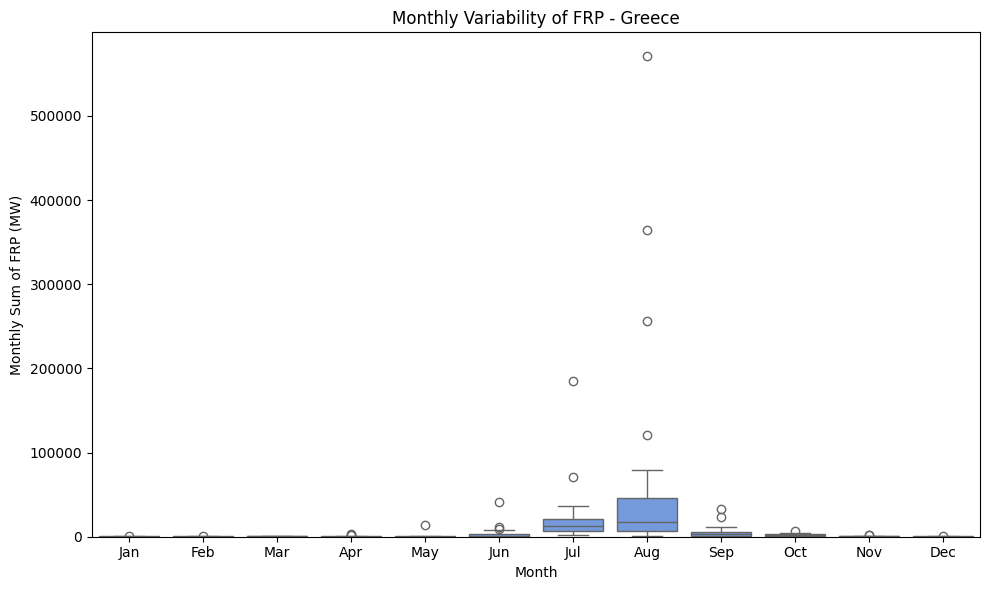

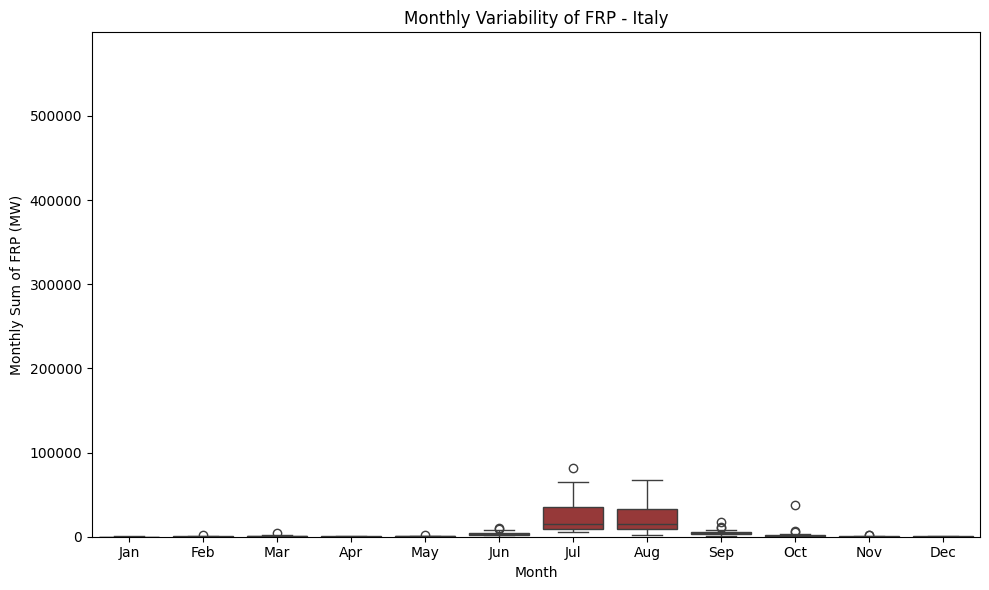

In [6]:
#Boxplot variability by month for every year

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_paths = {
    "Spain": r"E:\IPMA\FRP\FRP_2000_2024_Spain.csv",
    "Portugal": r"E:\IPMA\FRP\FRP_2000_2024_Portugal.csv",
    "Greece": r"E:\IPMA\FRP\FRP_2000_2024_Greece.csv",
    "Italy": r"E:\IPMA\FRP\FRP_2000_2024_Italy.csv",
}

region_colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown",
}

all_monthly = pd.DataFrame()

# Read and prepare all data first to find global y-axis limits
for region, csv_path in csv_paths.items():
    df = pd.read_csv(csv_path)
    df.columns = [col.lower() for col in df.columns]
    df['acq_date'] = pd.to_datetime(df['acq_date'])

    daily_sum = df.groupby('acq_date')['frp'].sum().reset_index()
    daily_sum['year'] = daily_sum['acq_date'].dt.year
    daily_sum['month'] = daily_sum['acq_date'].dt.month

    monthly_sum = daily_sum.groupby(['year', 'month'])['frp'].sum().reset_index()
    monthly_sum['region'] = region

    all_monthly = pd.concat([all_monthly, monthly_sum], ignore_index=True)

# Get global y-axis limits
y_min = 0
y_max = all_monthly['frp'].max() * 1.05  # Add 5% padding

# Plot one figure per region
for region in csv_paths.keys():
    region_data = all_monthly[all_monthly['region'] == region]

    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=region_data,
        x='month',
        y='frp',
        color=region_colors[region]
    )
    plt.title(f"Monthly Variability of FRP - {region}")
    plt.xlabel("Month")
    plt.ylabel("Monthly Sum of FRP (MW)")
    plt.xticks(
        ticks=range(0, 12),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    )
    plt.ylim(y_min, y_max)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


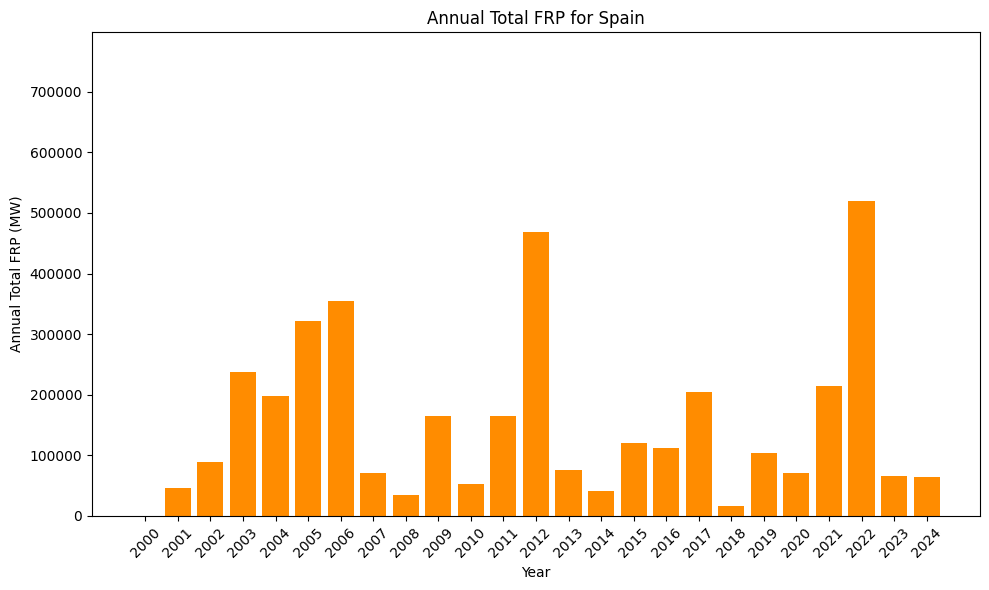

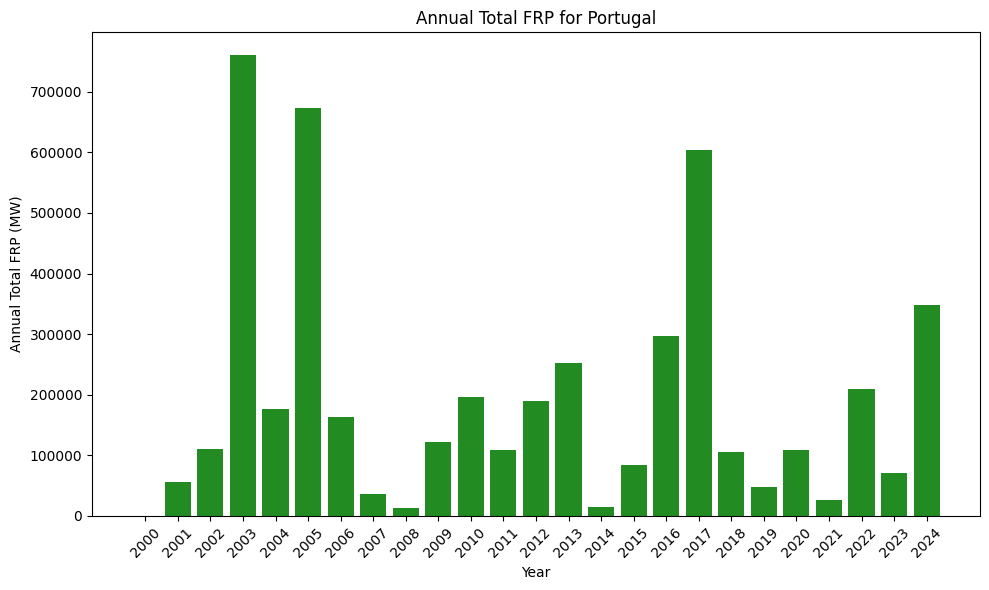

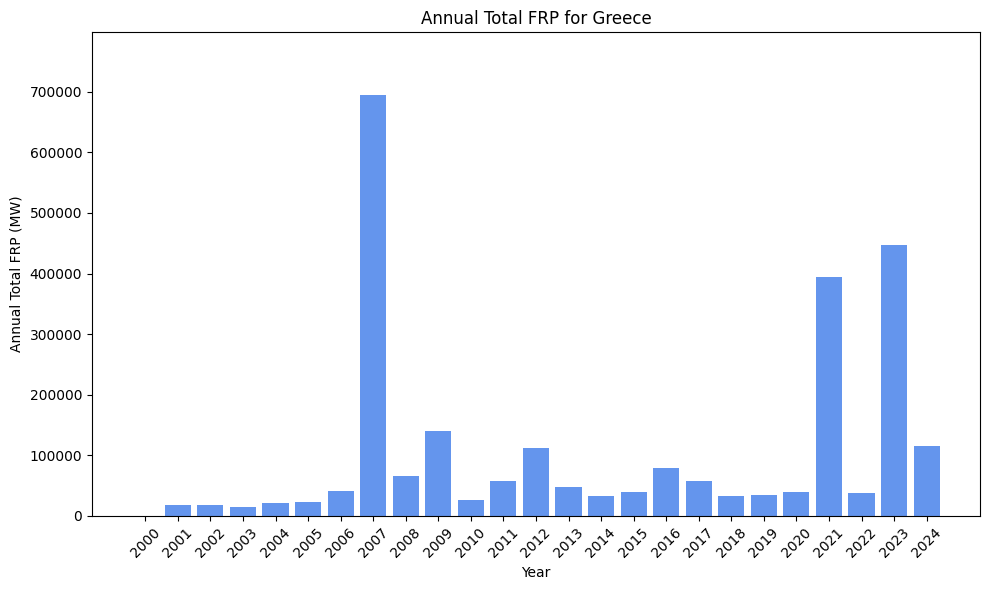

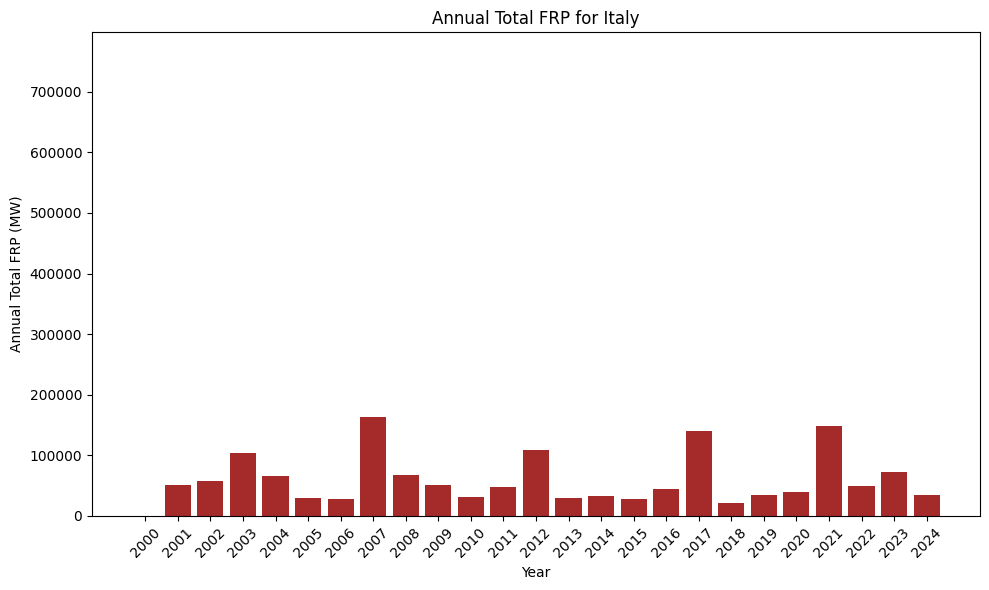

In [7]:
#Annual Total FRP

import pandas as pd
import matplotlib.pyplot as plt

# CSV paths for each country
csv_paths = {
    "Spain": r"E:\IPMA\FRP\FRP_2000_2024_Spain.csv",
    "Portugal": r"E:\IPMA\FRP\FRP_2000_2024_Portugal.csv",
    "Greece": r"E:\IPMA\FRP\FRP_2000_2024_Greece.csv",
    "Italy": r"E:\IPMA\FRP\FRP_2000_2024_Italy.csv",
}

# Colors for plotting
region_colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown",
}

all_annual = pd.DataFrame()

# Full year range
full_years = pd.Series(range(2000, 2025))

for region, csv_path in csv_paths.items():
    # Load and preprocess
    df = pd.read_csv(csv_path)
    df.columns = [col.lower() for col in df.columns]
    df['acq_date'] = pd.to_datetime(df['acq_date'])

    # Extract year
    df['year'] = df['acq_date'].dt.year

    # Aggregate annual sum
    annual_sum = df.groupby('year')['frp'].sum().reset_index()

    # Reindex to full years, fill missing with 0
    annual_sum = annual_sum.set_index('year').reindex(full_years, fill_value=0).reset_index()
    annual_sum.rename(columns={'index': 'year'}, inplace=True)  # just to be sure column name is year
    annual_sum['region'] = region

    # Append for y-axis scaling
    all_annual = pd.concat([all_annual, annual_sum], ignore_index=True)

# Calculate global y-axis limits
y_min = 0
y_max = all_annual['frp'].max() * 1.05

# Plot each region in a separate figure with shared y-axis limits
for region in csv_paths.keys():
    region_data = all_annual[all_annual['region'] == region]

    plt.figure(figsize=(10, 6))
    plt.bar(region_data['year'], region_data['frp'], color=region_colors[region])
    plt.title(f"Annual Total FRP for {region}")
    plt.xlabel("Year")
    plt.ylabel("Annual Total FRP (MW)")
    plt.ylim(y_min, y_max)
    plt.xticks(full_years, rotation=45)  # Ensure all years show on x-axis
    plt.grid(False)
    plt.tight_layout()
    plt.show()


     Region  Fire Days  No Fire Days  Total Days Observed
0     Spain       2756          6063                 8819
1  Portugal       1742          6852                 8594
2    Greece       1345          7438                 8783
3     Italy       2254          6498                 8752


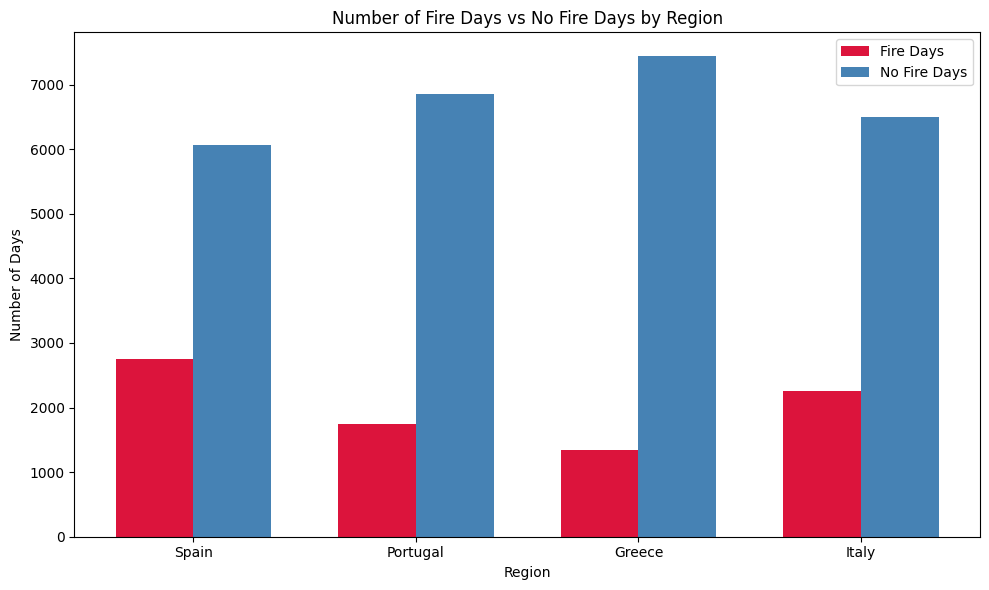

In [ ]:
#Fire Days and No Fire Days

import pandas as pd
import matplotlib.pyplot as plt

# CSV paths for each country
csv_paths = {
    "Spain": r"E:\IPMA\FRP\FRP_2000_2024_Spain.csv",
    "Portugal": r"E:\IPMA\FRP\FRP_2000_2024_Portugal.csv",
    "Greece": r"E:\IPMA\FRP\FRP_2000_2024_Greece.csv",
    "Italy": r"E:\IPMA\FRP\FRP_2000_2024_Italy.csv",
}

results = []

for region, csv_path in csv_paths.items():
    df = pd.read_csv(csv_path)
    df.columns = [col.lower() for col in df.columns]
    df['acq_date'] = pd.to_datetime(df['acq_date']).dt.date
    
    fire_days = set(df['acq_date'].unique())
    full_date_range = pd.date_range(start=df['acq_date'].min(), end=df['acq_date'].max()).date
    
    fire_day_count = len(fire_days)
    no_fire_day_count = len(full_date_range) - fire_day_count
    total_days = len(full_date_range)
    
    results.append({
        'Region': region,
        'Fire Days': fire_day_count,
        'No Fire Days': no_fire_day_count,
        'Total Days Observed': total_days
    })

results_df = pd.DataFrame(results)

print(results_df)

# Plotting
fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.35
index = range(len(results_df))

# Bars for fire days
fire_bars = ax.bar(index, results_df['Fire Days'], bar_width, label='Fire Days', color='crimson')

# Bars for no fire days (next to fire days)
no_fire_bars = ax.bar([i + bar_width for i in index], results_df['No Fire Days'], bar_width, label='No Fire Days', color='steelblue')

# Labels and titles
ax.set_xlabel('Region')
ax.set_ylabel('Number of Days')
ax.set_title('Number of Fire Days vs No Fire Days by Region')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(results_df['Region'])
ax.legend()

plt.tight_layout()
plt.show()


BIG THING TO HAVE INTO CONSIDERATION HERE. by having the csv files separated the number of days will be different

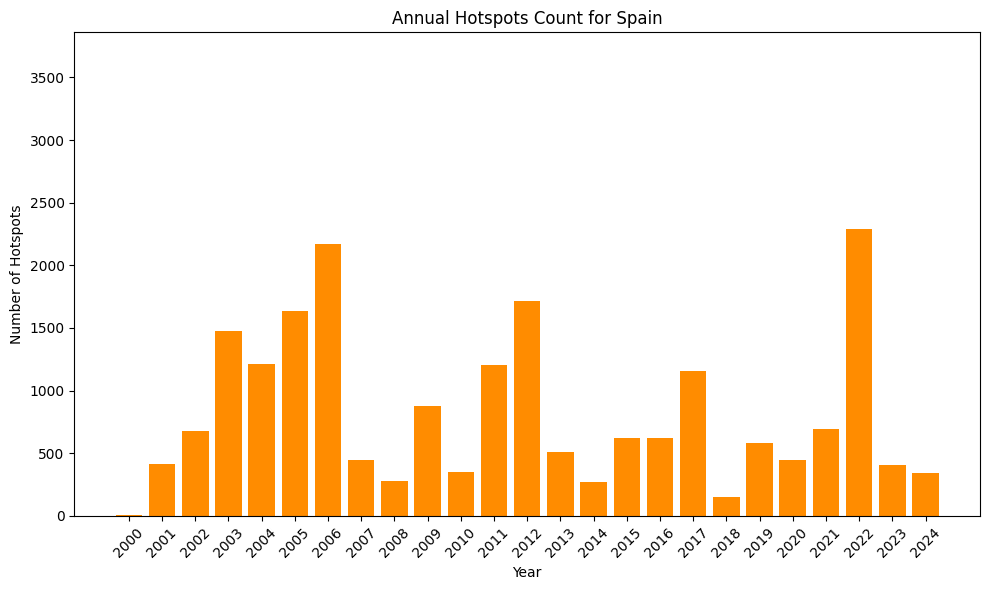

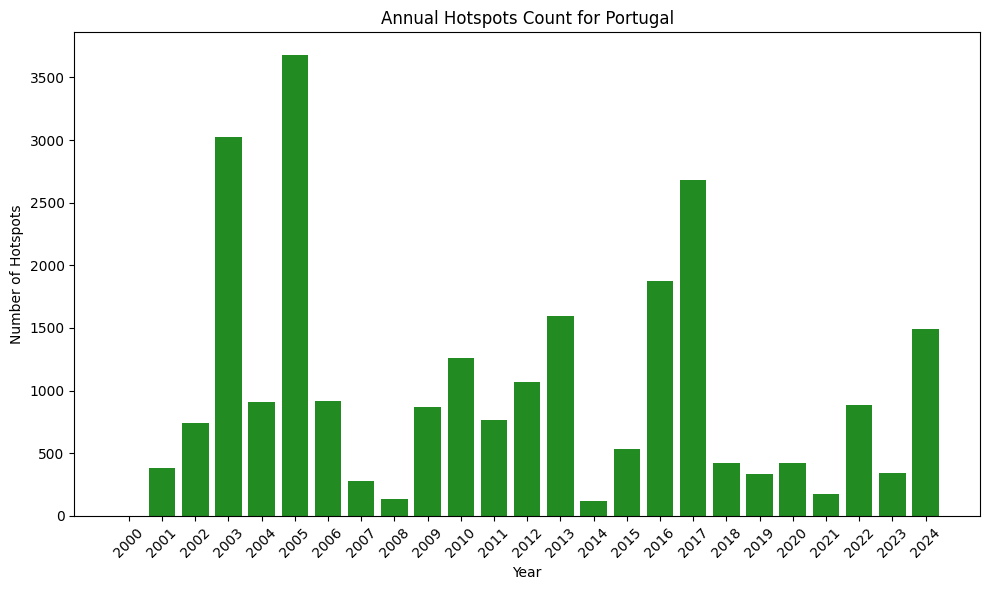

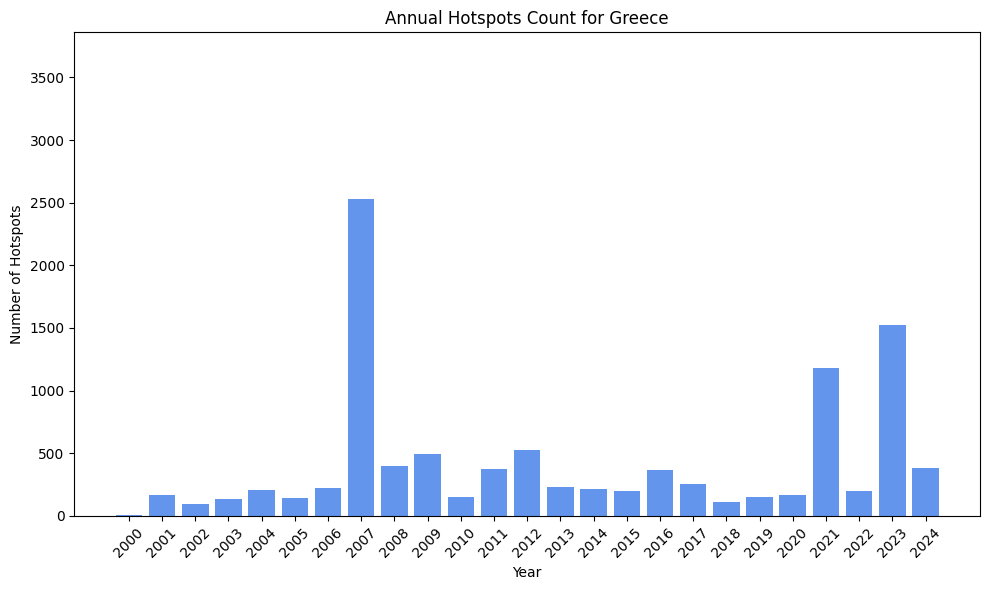

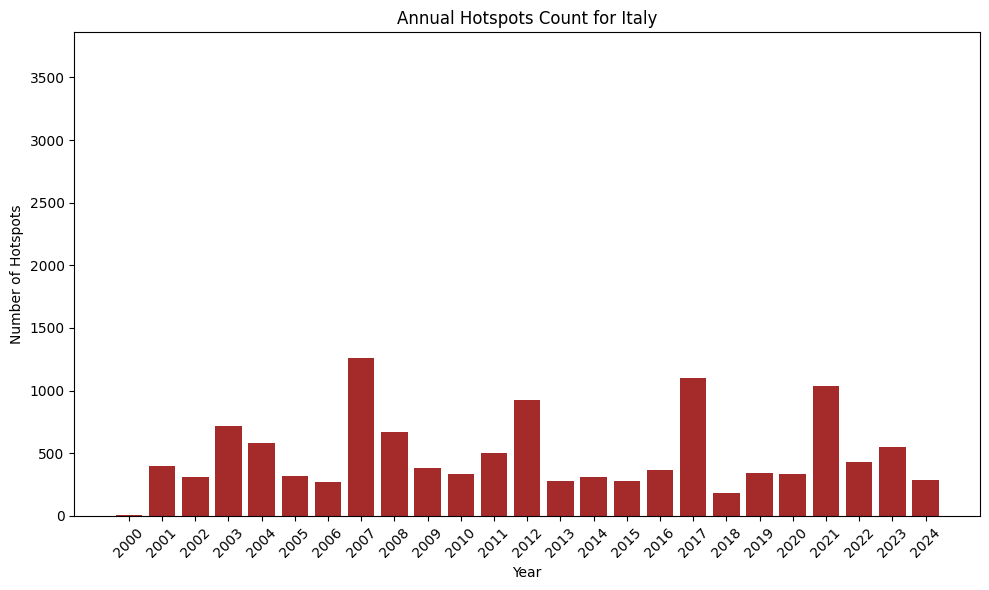

In [9]:
# Number of hotspots by year

import pandas as pd
import matplotlib.pyplot as plt

# CSV paths for each country
csv_paths = {
    "Spain": r"E:\IPMA\FRP\FRP_2000_2024_Spain.csv",
    "Portugal": r"E:\IPMA\FRP\FRP_2000_2024_Portugal.csv",
    "Greece": r"E:\IPMA\FRP\FRP_2000_2024_Greece.csv",
    "Italy": r"E:\IPMA\FRP\FRP_2000_2024_Italy.csv",
}

# Colors for plotting
region_colors = {
    "Spain": "darkorange",
    "Portugal": "forestgreen",
    "Greece": "cornflowerblue",
    "Italy": "brown",
}

full_years = pd.Series(range(2000, 2025))
all_counts = pd.DataFrame()

for region, csv_path in csv_paths.items():
    df = pd.read_csv(csv_path)
    df.columns = [col.lower() for col in df.columns]
    df['acq_date'] = pd.to_datetime(df['acq_date'])
    df['year'] = df['acq_date'].dt.year
    
    # Count hotspots per year
    annual_counts = df.groupby('year').size().reset_index(name='hotspots_count')
    
    # Reindex to full years and fill missing with 0
    annual_counts = annual_counts.set_index('year').reindex(full_years, fill_value=0).reset_index()
    annual_counts.rename(columns={'index': 'year'}, inplace=True)
    annual_counts['region'] = region
    
    all_counts = pd.concat([all_counts, annual_counts], ignore_index=True)

# Calculate global max for y-axis limits
y_max = all_counts['hotspots_count'].max() * 1.05  # add 5% headroom
y_min = 0

# Plotting each region's annual hotspots count with shared y-axis limits
for region in csv_paths.keys():
    region_data = all_counts[all_counts['region'] == region]

    plt.figure(figsize=(10, 6))
    plt.bar(region_data['year'], region_data['hotspots_count'], color=region_colors[region])
    plt.title(f"Annual Hotspots Count for {region}")
    plt.xlabel("Year")
    plt.ylabel("Number of Hotspots")
    plt.xticks(full_years, rotation=45)
    plt.ylim(y_min, y_max)  # Shared y-axis scale here
    plt.grid(False)
    plt.tight_layout()
    plt.show()


Transform from point dataset to grid dataset

In [1]:
# Turn point dataset into gridded dataset, where its horizontal resolution is 0.75º*0.75º

import pandas as pd
import numpy as np
import xarray as xr
import os

# === INPUT CSV FILE ===
csv_path = r"E:\IPMA\FRP\FRP_2000_2024.csv"

# === EXTRACT DIRECTORY AND CREATE OUTPUT FILENAME ===
base_dir = os.path.dirname(csv_path)
output_filename = "FRP_2000_2024_grid.nc"
output_path = os.path.join(base_dir, output_filename)

# === GRID PARAMETERS ===
lat_res = 0.75
lon_res = 0.75
lat_min, lat_max = 34.5, 66.25
lon_min, lon_max = -12, 36

lat_bins = np.arange(lat_min, lat_max + lat_res, lat_res)
lon_bins = np.arange(lon_min, lon_max + lon_res, lon_res)
lat_centers = lat_bins[:-1]
lon_centers = lon_bins[:-1]

# === LOAD AND PREPARE DATA ===
print("Loading and filtering data...")
df = pd.read_csv(csv_path)
df = df[(df['latitude'] >= lat_min) & (df['latitude'] <= lat_max) &
        (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max)]

# Filter out low-intensity values
df = df[df['frp'] >= 50]

# Ensure date is datetime
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Assign grid cell
print("Assigning points to grid cells...")
df['lat_bin'] = pd.cut(df['latitude'], bins=lat_bins, labels=lat_centers)
df['lon_bin'] = pd.cut(df['longitude'], bins=lon_bins, labels=lon_centers)
df.dropna(subset=['lat_bin', 'lon_bin'], inplace=True)

# Convert bins to float
df['lat_bin'] = df['lat_bin'].astype(float)
df['lon_bin'] = df['lon_bin'].astype(float)

# === AGGREGATE STATS ===
print("Aggregating FRP statistics...")
grouped = df.groupby(['acq_date', 'lat_bin', 'lon_bin'])

frp_stats = grouped['frp'].agg(
    FRP_sum='sum',
    FRP_mean='mean',
    FRP_median='median',
    FRP_max='max',
    FRP_min='min',
    FRP_std='std',
    count='count'
).reset_index()

# === CREATE FULL 3D ARRAYS ===
print("Creating 3D arrays...")

all_dates = pd.date_range(df['acq_date'].min(), df['acq_date'].max(), freq='D')
shape = (len(all_dates), len(lat_centers), len(lon_centers))

# Initialize arrays with NaNs
arrays = {
    'FRP_sum': np.full(shape, np.nan),
    'FRP_mean': np.full(shape, np.nan),
    'FRP_median': np.full(shape, np.nan),
    'FRP_max': np.full(shape, np.nan),
    'FRP_min': np.full(shape, np.nan),
    'FRP_std': np.full(shape, np.nan),
    'count': np.full(shape, np.nan),
}

lat_to_idx = {lat: i for i, lat in enumerate(lat_centers)}
lon_to_idx = {lon: i for i, lon in enumerate(lon_centers)}
date_to_idx = {date: i for i, date in enumerate(all_dates)}

# Fill arrays
for _, row in frp_stats.iterrows():
    d, lat, lon = row['acq_date'], row['lat_bin'], row['lon_bin']
    i, j, k = date_to_idx[d], lat_to_idx[lat], lon_to_idx[lon]
    for key in arrays:
        arrays[key][i, j, k] = row[key]

# Replace NaNs with 0 after filling arrays
for key in arrays:
    arrays[key] = np.nan_to_num(arrays[key], nan=0.0)


# === CREATE xarray.Dataset ===
print("Building xarray dataset...")
ds = xr.Dataset(
    {key: (["time", "latitude", "longitude"], arrays[key]) for key in arrays},
    coords={
        "time": all_dates,
        "latitude": lat_centers,
        "longitude": lon_centers,
    },
    attrs={
        "title": "Daily Gridded FRP Statistics (0.75° × 0.75°)",
        "source_file": os.path.basename(csv_path),
        "grid_resolution": "0.75 degrees",
        "description": "Includes daily FRP sum, mean, median, max, min, std, and detection count per grid cell"
    }
)

# === SAVE TO NETCDF ===
print(f"Saving to NetCDF: {output_path}")
ds.to_netcdf(output_path)
print("Done.")

ds

Loading and filtering data...
Assigning points to grid cells...
Aggregating FRP statistics...
Creating 3D arrays...
Building xarray dataset...
Saving to NetCDF: E:\IPMA\FRP\FRP_2000_2024_grid.nc
Done.


<xarray.Dataset> Size: 1GB
Dimensions:     (time: 8821, latitude: 43, longitude: 64)
Coordinates:
  * time        (time) datetime64[ns] 71kB 2000-11-01 2000-11-02 ... 2024-12-25
  * latitude    (latitude) float64 344B 34.5 35.25 36.0 ... 64.5 65.25 66.0
  * longitude   (longitude) float64 512B -12.0 -11.25 -10.5 ... 33.75 34.5 35.25
Data variables:
    FRP_sum     (time, latitude, longitude) float64 194MB 0.0 0.0 ... 0.0 0.0
    FRP_mean    (time, latitude, longitude) float64 194MB 0.0 0.0 ... 0.0 0.0
    FRP_median  (time, latitude, longitude) float64 194MB 0.0 0.0 ... 0.0 0.0
    FRP_max     (time, latitude, longitude) float64 194MB 0.0 0.0 ... 0.0 0.0
    FRP_min     (time, latitude, longitude) float64 194MB 0.0 0.0 ... 0.0 0.0
    FRP_std     (time, latitude, longitude) float64 194MB 0.0 0.0 ... 0.0 0.0
    count       (time, latitude, longitude) float64 194MB 0.0 0.0 ... 0.0 0.0
Attributes:
    title:            Daily Gridded FRP Statistics (0.75° × 0.75°)
    source_file:      FRP_2000_2024.csv
    grid_resolution:  0.75 degrees
    description:      Includes daily FRP sum, mean, median, max, min, std, an...

| Variable         | Description                                                                                                                                     |
| ---------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| **`FRP_sum`**    | The **total FRP** (sum of all detected fire pixels) in that grid cell on that day. Represents **total fire energy**.                            |
| **`FRP_mean`**   | The **average FRP** of all fire points within that grid cell on that day. Useful for typical fire intensity.                                    |
| **`FRP_median`** | The **median FRP** value for the fire points in the grid cell on that day. More robust to outliers than the mean.                               |
| **`FRP_max`**    | The **maximum FRP** among all fire points in that grid cell on that day. Indicates the **most intense fire**.                                   |
| **`FRP_min`**    | The **minimum FRP** detected in that grid cell on that day (≥50 by filter). Could suggest presence of small/low-intensity fires.                |
| **`FRP_std`**    | The **standard deviation** of FRP values in that grid cell on that day. Measures **variability** in fire intensity.                             |
| **`count`**      | The **number of fire detections** (i.e., how many fire points were detected) in that grid cell on that day. Indicates fire frequency or extent. |


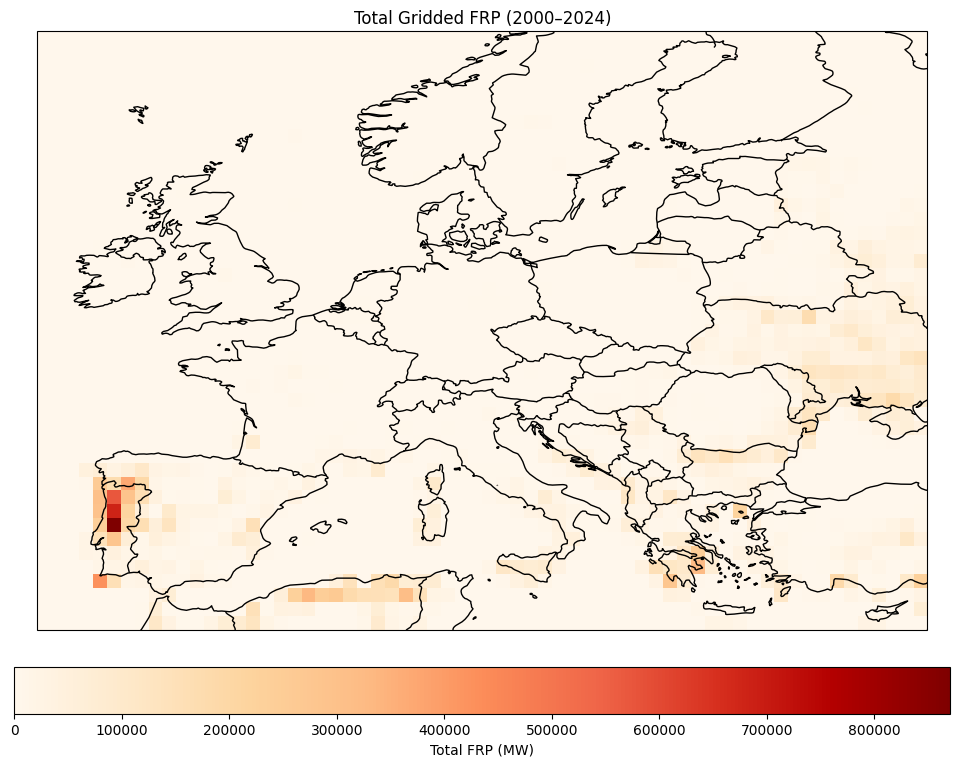

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the NetCDF dataset
ds = xr.open_dataset(r"E:\IPMA\FRP\FRP_2000_2024_grid.nc")

# Sum over time dimension to get total FRP per grid cell over all days
frp_sum = ds['FRP_sum'].sum(dim='time')

# Plotting
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Plot the summed FRP data
frp_sum.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='OrRd',
    cbar_kwargs={
        'label': 'Total FRP (MW)',
        'orientation': 'horizontal',
        'shrink': 0.8,   # scale the size (optional)
        'pad': 0.05
    }
)

plt.title("Total Gridded FRP (2000–2024)")
plt.tight_layout()
plt.show()
